# Time Series

Additive decomposition

$$
y_{t} = S_{t} + T_{t} + R_t,
$$


Multiplicative decomposition

$$
y_{t} = S_{t} \times T_{t} \times R_t
$$

The additive decomposition is the most appropriate if the magnitude of the seasonal fluctuations, or the variation around the trend-cycle, does not vary with the level of the time series. When the variation in the seasonal pattern, or the variation around the trend-cycle, appears to be proportional to the level of the time series, then a multiplicative decomposition is more appropriate

$$
y_{t} = S_{t} \times T_{t} \times R_t \quad\text{is equivalent to}\quad
  \log y_{t} = \log S_{t} + \log T_{t} + \log R_t.
$$

Seasonally adjusted series contain the remainder component as well as the trend-cycle. Therefore, they are not “smooth”, and “downturns” or “upturns” can be misleading. If the purpose is to look for turning points in a series, and interpret any changes in direction, then it is better to use the trend-cycle component rather than the seasonally adjusted data.

The first step in a classical decomposition is to use a **moving average method to estimate the trend-cycle**, so we begin by discussing moving averages.

<center><em>Adapted from Pierian Data</em></center>

<div class="alert alert-info"><h3>Further Reading:</h3>
    
<a href='https://otexts.com/fpp2/ets.html'>Nice book on Forecasting</a></strong>&nbsp;&nbsp;</div>

## ETS

## Error/Trend/Seasonality Models
As we begin working with <em>endogenous</em> data ("endog" for short) and start to develop forecasting models, it helps to identify and isolate factors working within the system that influence behavior. Here the name "endogenous" considers internal factors, while "exogenous" would relate to external forces. These fall under the category of <em>state space models</em>, and include <em>decomposition</em> (described below), and <em>exponential smoothing</em> (described in an upcoming section).

The <a href='https://en.wikipedia.org/wiki/Decomposition_of_time_series'>decomposition</a> of a time series attempts to isolate individual components such as <em>error</em>, <em>trend</em>, and <em>seasonality</em> (ETS). We've already seen a simplistic example of this in the <strong>Introduction to Statsmodels</strong> section with the Hodrick-Prescott filter. There we separated data into a trendline and a cyclical feature that mapped observed data back to the trend.


## Seasonal Decomposition
Statsmodels provides a <em>seasonal decomposition</em> tool we can use to separate out the different components. This lets us see quickly and visually what each component contributes to the overall behavior.


We apply an <strong>additive</strong> model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add 10,000 passengers).<br>
A <strong>multiplicative</strong> model is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of passengers).

For these examples we'll use the International Airline Passengers dataset, which gives monthly totals in thousands from January 1949 to December 1960.

In [2]:
from pylab import rcParams

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

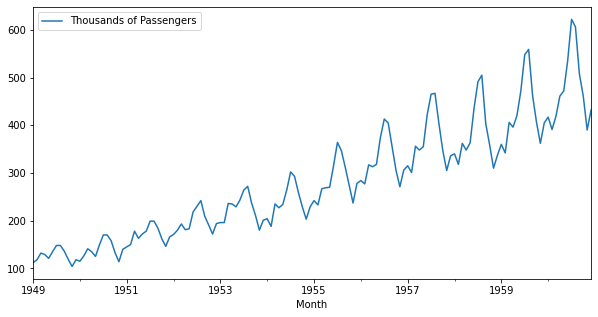

In [19]:
%matplotlib inline
filename = '/TimeSeriesAnalysis/TSA_COURSE_NOTEBOOKS/Data/airline_passengers.csv' 
ROOT_DIR = 'C:/Users/ilsup/PycharmProjects/Warehouse'

airline = pd.read_csv(ROOT_DIR + filename, index_col='Month', parse_dates=True)
rcParams['figure.figsize'] = 10, 5
airline.dropna(inplace=True)
airline.plot();

### ETS Models 
(Error, Trend, Seasonality)

**Additive** model: when the data look like linear, or **Multiplicative** model, when the data look like exponential; 

C:\Users\ilsup\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ilsup\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ilsup\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\ilsup\Anaconda3\lib\site-packages\pandas\plotting\_matpl

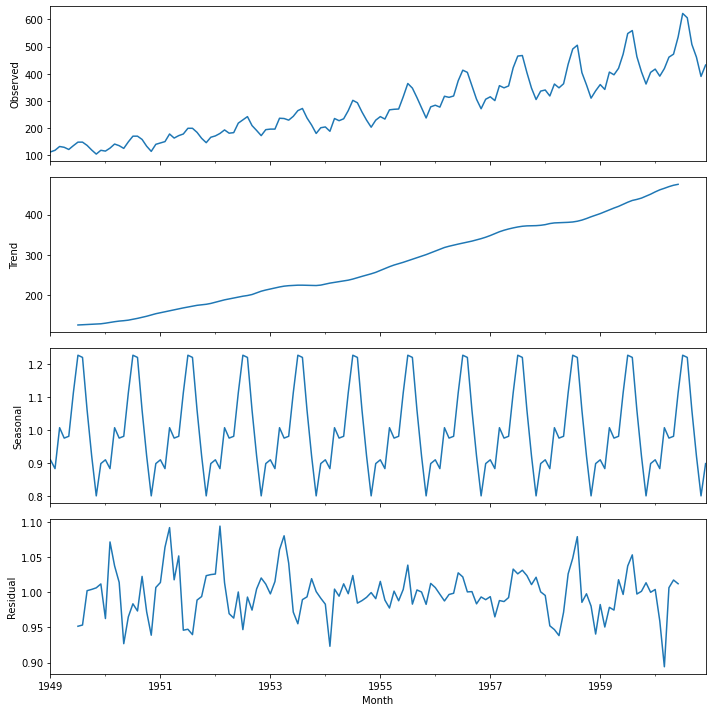

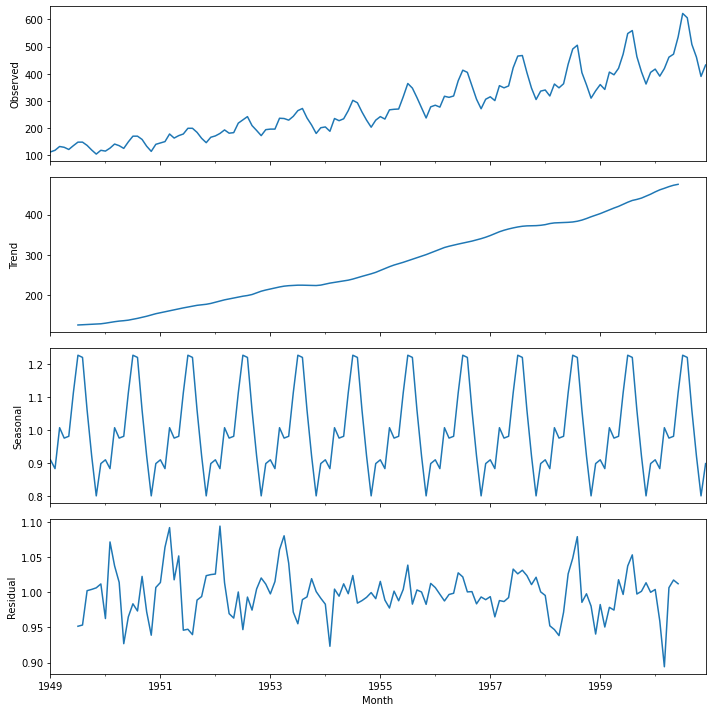

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

rcParams['figure.figsize'] = 10, 10
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')  # model='mul' also works
result.plot()

C:\Users\ilsup\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ilsup\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ilsup\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\ilsup\Anaconda3\lib\site-packages\pandas\plotting\_matpl

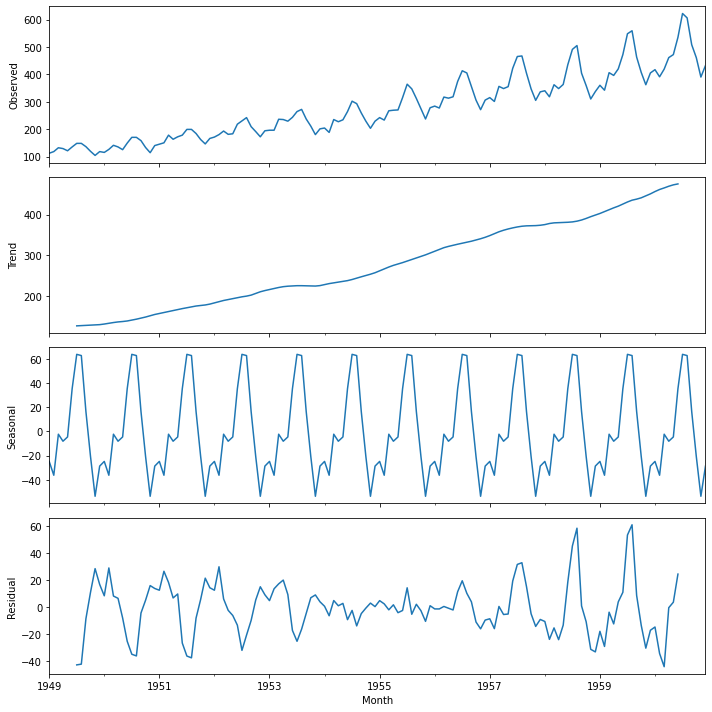

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

rcParams['figure.figsize'] = 10, 10
result = seasonal_decompose(airline['Thousands of Passengers'], model='additive')  # model='mul' also works
result.plot();

## Classical Decomposition

Let's only calculate multiplicative 


1. If $m$ is an even number, compute the trend-cycle component $\hat{T}_t$ using a 2×$m$ moving average
2. These seasonal indexes are then adjusted to ensure that they add to $m$
3. 
4. 

In [6]:
%matplotlib inline
ROOT_DIR = 'C:/Users/ilsup/PycharmProjects/Warehouse'
airline = pd.read_csv(ROOT_DIR + '/TimeSeriesAnalysis/TSA_COURSE_NOTEBOOKS/Data/airline_passengers.csv',
                      index_col='Month',
                      parse_dates=True)

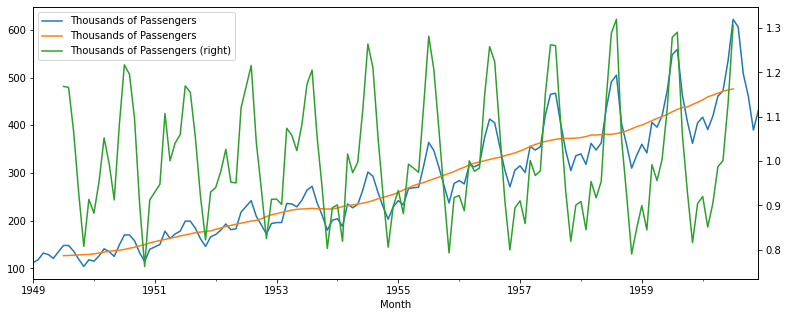

In [7]:
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(111)
m = 12  # monthly data
airline.plot(ax=ax)

airline_roll_mean = airline.rolling(window=m, center=True).mean()
airline_roll_mean.plot(ax=ax)
airline_detrended = airline / airline_roll_mean
airline_detrended.plot(ax=ax, secondary_y=True)
plt.show()

In [14]:
seasonal = airline_detrended.groupby(airline_detrended.index.month).mean()
seasonal_adj = seasonal / seasonal.sum() * m  # ensure that they add to m
seasonal_adj.columns = ['season']

In [9]:
airline_roll_mean['month_match'] = [i.month for i in airline_detrended.reset_index().Month]

In [10]:
airline_with_season = airline_roll_mean.merge(seasonal_adj, left_on='month_match', right_index=True).sort_index()

In [11]:
trend_plus_season = (airline_with_season.loc[:, "Thousands of Passengers"] * airline_with_season.loc[:, "season"])

In [12]:
remainder = airline.iloc[:, 0] / trend_plus_season

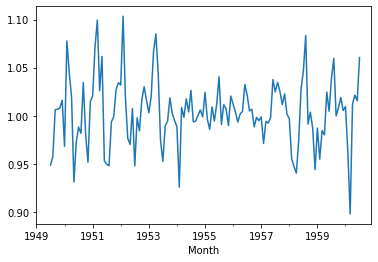

In [18]:
remainder.plot()

The **strenght of the Trend** is defined as:

$$F_T = \max\left(0, 1 - \frac{\text{Var}(R_t)}{\text{Var}(T_t+R_t)}\right).$$

The **strength of Seasonality** is defined as:

$$F_S = \max\left(0, 1 - \frac{\text{Var}(R_t)}{\text{Var}(S_{t}+R_t)}\right)$$


4.5 Autoregressive models
4.5.1 Definition
The series ${xt}$ is an autoregressive process of order p, abbreviated to AR(p), if

xt = α1xt−1 + α2xt−2 + . . . + αpxt−p + wt (4.15)

where {wt} is white noise and the αi are the model parameters with αp 6= 0
for an order p process. Equation (4.15) can be expressed as a polynomial of
order p in terms of the backward shift operator:
θp(B)xt = (1 − α1B − α2B2 − . . . − αpBp)xt = wt (4.16)
The following points should be noted:
1. The random walk is the special case AR(1) with α1 = 1
2. The exponential smoothing model is the special case αi = α(1 − α)i for i = 1, 2, . . . and p → ∞.
3. The model is a regression of xt on past terms from the same series; hence the use of the term ‘autoregressive’.
4. A prediction at time t is given by ˆxt = α1xt−1 + α2xt−2 + . . . + αpxt−p (4.17)
5. The model parameters can be estimated by minimising the sum of squared
errors.

Example
Consider the model -

$$y(t) = a + bt + c y(t-1) + u(t)$$

where $u(t)$ is white noise: $\mathrm{E}(u(t))=0$ and $\mathrm{Var}(u(t))=\sigma^2$ 

Non stationary pure Random Walk
If you have a =0 and b=0 and c = 1; then your model becomes

$$y(t) = y(t-1) + u(t)$$

This is pure random walk and non stationary.

Why non stationary?

Substitute for y(t-1) = y(t-2) + u(t-1)
And then y(t-2) = y(t-3) + u(t-1) and so on and you will get

y(t) = y(0) + u(t) + u(t-1) + u(t-2) + ....

So, we have E[y(t)] = y(0).
Var(y(t)) = t *  σ2  - Non stationary!

Below image shows an example of how such a process can evolve over time -

In [1]:
# https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

data = stock_int
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# fit model
model = ExponentialSmoothing(data, trend='add',seasonal='add',seasonal_periods=52)
model_fit = model.fit()
model_fit.fittedvalues.plot()
stock_int.plot()
plt.show()


NameError: name 'stock_int' is not defined